In [299]:
import pyspark as ps 
import pandas as pd 
import matplotlib.pyplot as plt 

In [300]:
spark = (ps.sql.SparkSession.builder
       .master("local[4]")
       .appName("sparkSQL exercise")
       .getOrCreate()
       )

In [301]:
sc = spark.sparkContext

In [302]:
sc


<SparkContext master=local[4] appName=sparkSQL exercise>

In [303]:
df = spark.read.csv('../../../../Desktop/DSI/Data_Sets/245_1 .csv',
                   header = True,
                   quote = '"',
                   sep = ',',
                   inferSchema = True)

In [304]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: timestamp (nullable = true)
 |-- dateUpdated: timestamp (nullable = true)
 |-- ean: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- reviews.date: string (nullable = true)
 |-- reviews.dateAdded: timestamp (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- reviews.didPurchase: boolean (nullable = true)
 |-- reviews.doRecommend: boolean (nullable = true)
 |-- reviews.id: integer (nullable = true)
 |-- reviews.numHelpful: integer (nullable = true)
 |-- reviews.rating: integer (nullable = true)
 |-- reviews.sourceURLs: string (nullable = true)
 |-- reviews.text: string (nullable = true)
 |-- reviews.title: string (nullable = true)
 |-- reviews.userCity: string (nullable = true)
 |-- reviews.us

In [305]:
df.describe()


DataFrame[summary: string, id: string, brand: string, categories: string, ean: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, reviews.date: string, reviews.dateSeen: string, reviews.id: string, reviews.numHelpful: string, reviews.rating: string, reviews.sourceURLs: string, reviews.text: string, reviews.title: string, reviews.userCity: string, reviews.userProvince: string, reviews.username: string, upc: string]

In [306]:
df = df.withColumnRenamed('reviews.date','reviewsdate').withColumnRenamed("reviews.didPurchase","didPurchase").withColumnRenamed('reviews.doRecommend','doRecommend').withColumnRenamed('reviews.rating','reviewsrating').withColumnRenamed('reviews.text','reviewstext').withColumnRenamed('reviews.title','reviewstitle').withColumnRenamed('reviews.sourceURLs','URL')


In [307]:
df.createOrReplaceTempView('df_reviews')

In [340]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: timestamp (nullable = true)
 |-- dateUpdated: timestamp (nullable = true)
 |-- ean: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- reviewsdate: string (nullable = true)
 |-- reviews.dateAdded: timestamp (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- didPurchase: boolean (nullable = true)
 |-- doRecommend: boolean (nullable = true)
 |-- reviews.id: integer (nullable = true)
 |-- reviews.numHelpful: integer (nullable = true)
 |-- reviewsrating: integer (nullable = true)
 |-- URL: string (nullable = true)
 |-- reviewstext: string (nullable = true)
 |-- reviewstitle: string (nullable = true)
 |-- reviews.userCity: string (nullable = true)
 |-- reviews.userProvince: string (nullable = true

In [341]:
df_sql_brand = spark.sql("SELECT brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL FROM df_reviews")
df_sql_brand.show(10)

+---------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------+-------------+--------------------+------------------+--------------------+
|          brand|          categories|        manufacturer|                name|         reviewsdate|didPurchase|doRecommend|reviewsrating|         reviewstext|      reviewstitle|                 URL|
+---------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------+-------------+--------------------+------------------+--------------------+
|Universal Music|Movies, Music & B...|Universal Music G...|Pink Friday: Roma...|2012-11-30T06:21:...|       null|       null|            5|i love this album...|      Just Awesome|https://redsky.ta...|
|       Lundberg|Food,Packaged Foo...|            Lundberg|Lundberg Organic ...|2017-07-09T00:00:...|       true|       null|            5|Good flavor. This...|              Good|https://www.walma

In [342]:
pandas_df = df_sql_brand.toPandas()

In [311]:
len(pandas_df)


71044

In [312]:
pandas_df

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,None,None,5,i love this album. it's very good. more to the...,Just Awesome
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor. This review was collected as part...,Good
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor.,Good
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation
...,...,...,...,...,...,...,...,...,...,...
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-25T00:00:00.000Z,False,True,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-12-07T00:00:00.000Z,False,True,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!
71041,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-07-23T00:00:00.000Z,False,True,5,Right price,My review
71042,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,2016-01-19T18:28:16.000Z,None,True,5,I was so pleased when this scarf arrived for m...,Wonderful Product


In [331]:
null = pandas_df[pandas_df["reviewsrating"]<3]
null

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation
5,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it
6,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing
7,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all
...,...,...,...,...,...,...,...,...,...,...
70848,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-03-04T00:00:00.000Z,None,None,2,Well the box was damaged and all destroyed,Well the box was damaged and all destroyed !!!
70849,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2014-04-03T00:00:00.000Z,False,False,2,There are better products available than this....,Biotrue is better
70850,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-09-02T00:00:00.000Z,False,False,2,I ordered the Alcon lasting comfort (no rub fo...,Item pictured is not the item Walmart sends
70851,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-05-22T00:00:00.000Z,False,False,2,Been using express for many years. Super bumme...,no rub was far better


In [352]:
nverifieddf= pandas_df[pandas_df["didPurchase"]== False]
len(nverifieddf)
nverifieddf

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,https://www.walmart.com/reviews/product/43383370
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,https://www.walmart.com/reviews/product/43383370
5,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,https://www.walmart.com/reviews/product/43383370
6,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,https://www.walmart.com/reviews/product/43383370
7,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71037,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-10-14T00:00:00.000Z,False,True,5,Great item,Great,https://www.walmart.com/reviews/product/10294232
71038,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2010-07-17T00:00:00.000Z,False,True,5,Since I've starting wearing my contacts full-t...,Worth every penny.,https://www.walmart.com/reviews/product/10294231
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-25T00:00:00.000Z,False,True,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem,https://www.walmart.com/reviews/product/10294231
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-12-07T00:00:00.000Z,False,True,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!,https://www.walmart.com/reviews/product/10294231


In [326]:
low_unverified= nverifieddf[nverifieddf['reviewsrating']<3]
low_unverified

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation
5,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it
6,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing
7,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all
...,...,...,...,...,...,...,...,...,...,...
70846,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-09-03T00:00:00.000Z,False,False,2,I purchased this product at my local big box s...,Opti-Free Replenish is does not replenish
70849,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2014-04-03T00:00:00.000Z,False,False,2,There are better products available than this....,Biotrue is better
70850,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-09-02T00:00:00.000Z,False,False,2,I ordered the Alcon lasting comfort (no rub fo...,Item pictured is not the item Walmart sends
70851,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-05-22T00:00:00.000Z,False,False,2,Been using express for many years. Super bumme...,no rub was far better


In [317]:
high_unverified= nverifieddf[nverifieddf['reviewsrating']>3]
high_unverified

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle
20,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-05-12T00:00:00.000Z,False,True,4,I noticed this product on clearance at a store...,We love it!
21,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2015-11-04T00:00:00.000Z,False,True,4,I used this product a couple of times since i ...,good times
22,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-07T00:00:00.000Z,False,True,4,Used a few times stays a bit sticky but not to...,Does the job
25,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2015-11-05T00:00:00.000Z,False,True,5,I really enjoyed using this product with my hu...,That little extra something..
26,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2015-11-04T00:00:00.000Z,False,True,5,Awesome Product for couples. It is a warm feel...,Great Product!
...,...,...,...,...,...,...,...,...,...,...
71037,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-10-14T00:00:00.000Z,False,True,5,Great item,Great
71038,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2010-07-17T00:00:00.000Z,False,True,5,Since I've starting wearing my contacts full-t...,Worth every penny.
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-25T00:00:00.000Z,False,True,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-12-07T00:00:00.000Z,False,True,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!


In [346]:
verifieddf = pandas_df[pandas_df["didPurchase"] == True]
verifieddf

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor. This review was collected as part...,Good,https://www.walmart.com/reviews/product/29775278
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor.,Good,https://www.walmart.com/reviews/product/29775278
18,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-01T00:00:00.000Z,True,True,3,I bought this because it had better reviews th...,Pretty nice,https://www.walmart.com/reviews/product/43383370
23,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2017-08-15T00:00:00.000Z,True,None,5,Loved This review was collected as part of a p...,Loved,https://www.walmart.com/reviews/product/43383370
24,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-11-26T00:00:00.000Z,True,True,5,This is a good product. Will give you a great ...,Great sensation,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71020,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-11T00:00:00.000Z,True,True,5,I recommend this for people with dry eye who s...,Works For Dry Eye,https://www.walmart.com/reviews/product/17325078
71021,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-26T00:00:00.000Z,True,True,5,This is the only contact solution I use. I hav...,Best contact solution,https://www.walmart.com/reviews/product/17325078
71025,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-13T00:00:00.000Z,True,True,5,This is great for using daily to disinfect you...,Awesome product,https://www.walmart.com/reviews/product/17325078
71026,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-08-22T00:00:00.000Z,True,True,5,Worked wonderful !!,Margaret,https://www.walmart.com/reviews/product/173250...


In [344]:
verifieddf['brand'].unique()

array(['Lundberg', 'K-Y', 'J.R. Watkins', 'AMBI', "Johnson's", 'Olay',
       'Windex', 'KIND', 'Aussie', 'Disney', 'CeraVe', 'Neutrogena',
       'Meguiars', 'Banana Boat', 'Cetaphil', 'Suave', 'Bumble Bee',
       'Citrus Magic', 'Biokleen', 'Yes to Carrots', 'Warner Bros.',
       'Target.com Use Only', 'FOX', 'Hawaiian Punch',
       'Universal Home Video', 'Holmes', 'Pantene', 'MaraNatha', 'Chex',
       'TRESemme', 'Wagan', 'Creme Of Nature', 'Arrid', 'Eagle Brand',
       'Canada Dry', 'Ragu', "Newman's Own Organics", 'Hoover',
       'Calvin Klein', 'Sony Pictures', "Annie's", 'Super PoliGrip',
       'Nearly Natural', 'Australian Gold', 'Summit Entertainment',
       'Hormel', 'Tai Pei', 'Clorox', 'Chips Deluxe', 'Orajel',
       "Chester's", 'D-Con', 'Lysol', 'COOLA', 'Simple Green',
       'Cuisinart', 'Iman', 'Pioneer', 'Bounce', 'Just For Men',
       'Mill Creek', 'All-Bran', 'Coty', 'Power Crunch',
       'INC International Concepts', 'Nojo', 'Sizzix', 'Vaseline',
      

In [347]:
len(verifieddf['brand'].unique())

222

In [328]:
low_verified= verifieddf[verifieddf['reviewsrating']<3]
low_verified

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle
40,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2016-12-02T00:00:00.000Z,True,False,1,I WON'T recommend this product to anyone,It has a nasty smell that would get anyone sick
42,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2017-04-05T00:00:00.000Z,True,None,2,"I did receive 1 bottle but when I ordered, it ...",Not the quantity specifed
64,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2017-06-25T00:00:00.000Z,True,False,1,I used it for several days in a row and I felt...,It didn't feel natural on my skin.
65,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-03-08T00:00:00.000Z,True,False,1,I buy Olay Regenerist all the time from CVS an...,Different formula than normal
68,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-09-22T00:00:00.000Z,True,False,2,Just didn't have the moisture I am used too. T...,Not for me
...,...,...,...,...,...,...,...,...,...,...
62035,Lemi Shine,"Household Essentials,Cleaning Supplies,Dish De...",Lemi Shine,Lemi Shine Dishwasher Detergent Booster -24 Oz,2016-09-12T00:00:00.000Z,True,False,1,this product claims to help get your glasses s...,not very good
62479,Suave,"Personal Care,Deodorants & Antiperspirants,Deo...",Suave,Suave Anti-Perspirant Deodorant Invisible Soli...,2016-10-20T00:00:00.000Z,True,False,2,this is ok if you want to smell good but it do...,so so
66336,Softsoap,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Colgate-Palmolive,Softsoap Body Butter Scrub Coconut and Jojoba ...,2016-07-22T00:00:00.000Z,True,False,2,That is have grit,Dont like the grit in the prouct
68836,Karaoke Usa,"Musical Instruments & Karaoke,Karaoke Equipmen...",Karaoke USA,Karaoke Usa Professional Dvd/cdg/mp3g Karaoke ...,2017-01-01T00:00:00.000Z,True,False,1,I purchased this karaoke for my grandchildren....,Extremely Poor Quality


In [322]:
high_verified = verifieddf[verifieddf['reviewsrating']>3]
high_verified

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor. This review was collected as part...,Good
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor.,Good
23,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2017-08-15T00:00:00.000Z,True,None,5,Loved This review was collected as part of a p...,Loved
24,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-11-26T00:00:00.000Z,True,True,5,This is a good product. Will give you a great ...,Great sensation
31,J.R. Watkins,"Personal Care,Skin Care,Hand Cream,Beauty,Body...",J.R. Watkins,"J.R. Watkins Hand Cream, Lemon Cream",2017-06-08T00:00:00.000Z,True,True,5,The Hand-Cream-Lemon-Cream has such a refreshi...,One of my favorites
...,...,...,...,...,...,...,...,...,...,...
71020,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-11T00:00:00.000Z,True,True,5,I recommend this for people with dry eye who s...,Works For Dry Eye
71021,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-26T00:00:00.000Z,True,True,5,This is the only contact solution I use. I hav...,Best contact solution
71025,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-13T00:00:00.000Z,True,True,5,This is great for using daily to disinfect you...,Awesome product
71026,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-08-22T00:00:00.000Z,True,True,5,Worked wonderful !!,Margaret


In [ ]:
brand = pandas_df['brand'].unique()
brand

In [ ]:
len(brand)

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))


ax.hist(pandas_df['reviewsrating'])
plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Review Ratings Total')
plt.show()

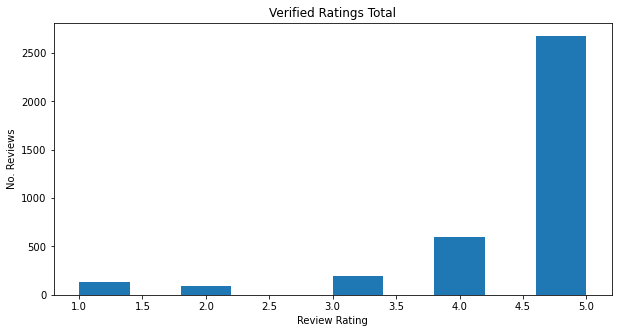

In [333]:
fig,ax = plt.subplots(figsize = (10,5))

ax.hist(verifieddf['reviewsrating'])

plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Verified Ratings Total')

plt.show()

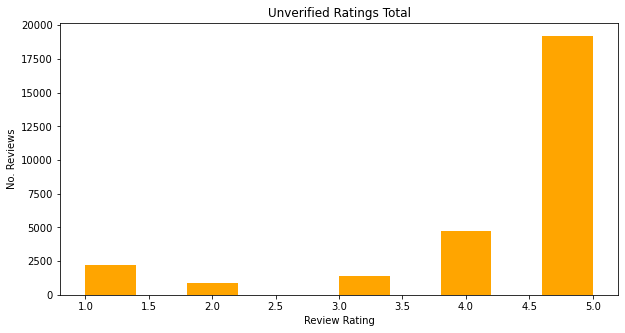

In [332]:
fig,ax = plt.subplots(figsize = (10,5))

# ax.hist(verifieddf['reviewsrating'])
ax.hist(nverifieddf['reviewsrating'],color = 'orange')
plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Unverified Ratings Total')
plt.show()


In [336]:
textlst = pandas_df['reviewstitle']
retstring = []
for i in textlst:
    if type(i) == str:
        retstring.append(i.lower()) 
titled={}
for i in retstring:
    if i not in titled:
        titled[i]= 0
    titled[i]+= 1 
titled
{k: v for k, v in sorted(titled.items(), key=lambda item: item[1],reverse = True)}

{'great movie': 2303,
 'great product': 1188,
 'good movie': 1091,
 'great': 634,
 'clorox wipes': 511,
 'love it': 436,
 'awesome': 428,
 'good': 316,
 'great family movie': 315,
 'love it!': 313,
 'funny movie': 301,
 'great product!': 294,
 'great movie!': 286,
 'cute movie': 280,
 'funny': 251,
 'excellent': 250,
 'awesome movie': 219,
 'good product': 190,
 'amazing': 187,
 'fun movie': 178,
 'easy to use': 175,
 'awesome product': 169,
 'great!': 169,
 'five stars': 166,
 'clorox': 160,
 'love this product': 155,
 'love': 153,
 'awesome!': 148,
 'hilarious': 145,
 'excellent movie': 144,
 'wipes': 143,
 'excellent product': 137,
 'great kids movie': 131,
 'olay total effects': 117,
 'tide pods': 115,
 'movie': 111,
 'works great': 109,
 'the best': 108,
 'love this product!': 103,
 'ok movie': 95,
 'ok': 91,
 'love this movie': 91,
 'good family movie': 89,
 'disappointed': 87,
 'amazing!': 87,
 'love!': 84,
 'loved it': 83,
 'love them': 81,
 'convenient': 80,
 'great moisturize

In [371]:
verifieddf[verifieddf['URL'].str.contains('walmart')]

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor. This review was collected as part...,Good,https://www.walmart.com/reviews/product/29775278
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor.,Good,https://www.walmart.com/reviews/product/29775278
18,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-01T00:00:00.000Z,True,True,3,I bought this because it had better reviews th...,Pretty nice,https://www.walmart.com/reviews/product/43383370
23,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2017-08-15T00:00:00.000Z,True,None,5,Loved This review was collected as part of a p...,Loved,https://www.walmart.com/reviews/product/43383370
24,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-11-26T00:00:00.000Z,True,True,5,This is a good product. Will give you a great ...,Great sensation,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71020,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-11T00:00:00.000Z,True,True,5,I recommend this for people with dry eye who s...,Works For Dry Eye,https://www.walmart.com/reviews/product/17325078
71021,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-26T00:00:00.000Z,True,True,5,This is the only contact solution I use. I hav...,Best contact solution,https://www.walmart.com/reviews/product/17325078
71025,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-13T00:00:00.000Z,True,True,5,This is great for using daily to disinfect you...,Awesome product,https://www.walmart.com/reviews/product/17325078
71026,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-08-22T00:00:00.000Z,True,True,5,Worked wonderful !!,Margaret,https://www.walmart.com/reviews/product/173250...


In [369]:
nverifieddf[nverifieddf['URL'].str.contains('walmart')]

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,https://www.walmart.com/reviews/product/43383370
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,https://www.walmart.com/reviews/product/43383370
5,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,https://www.walmart.com/reviews/product/43383370
6,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,https://www.walmart.com/reviews/product/43383370
7,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71037,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-10-14T00:00:00.000Z,False,True,5,Great item,Great,https://www.walmart.com/reviews/product/10294232
71038,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2010-07-17T00:00:00.000Z,False,True,5,Since I've starting wearing my contacts full-t...,Worth every penny.,https://www.walmart.com/reviews/product/10294231
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-25T00:00:00.000Z,False,True,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem,https://www.walmart.com/reviews/product/10294231
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-12-07T00:00:00.000Z,False,True,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!,https://www.walmart.com/reviews/product/10294231


In [ ]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in retstring.split(' '):
    if i.lower() not in dicts:
        dicts[i.lower()]=0
    dicts[i.lower()]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}


In [ ]:
textlst = verifieddf['reviewstitle'].tolist()
vretstring = []
for i in textlst:
    if type(i) == str:
        vretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in vretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
# total verified review titles 

In [ ]:
len(verifieddf)

In [ ]:
textlst = nverifieddf['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
#total unverified review title words 

In [ ]:
len(nverifieddf)

In [ ]:
high_verify= verifieddf[verifieddf['reviewsrating']== 5]
textlst = high_verify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
#  verified reviews with high ratings 

In [ ]:
low_verify= verifieddf[verifieddf['reviewsrating']== 1]
textlst = low_verify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

# verfified reviews  with low rating

In [ ]:
low_nverify= nverifieddf[nverifieddf['reviewsrating']== 1]
textlst = low_nverify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

#low unverified ratings for products 

In [ ]:
high_nverify= nverifieddf[nverifieddf['reviewsrating']== 5]
textlst = high_nverify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

#high unverified ratings for product

In [392]:
allclorox=pandas_df[pandas_df['brand'].str.contains('Clorox')]
len(allclorox)

10700

In [395]:
cloroxnv= nverifieddf[nverifieddf['brand'].str.contains('Clorox')]
len(cloroxnv)

8378

In [406]:
nveric= cloroxnv[cloroxnv['reviewsrating']<3]
len(nveric)

29

In [396]:
cloroxv= verifieddf[verifieddf['brand'].str.contains('Clorox')]
len(cloroxv)


25

In [401]:
len(cloroxv[cloroxv['reviewsrating']<4])


1